In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
csv = pd.read_csv("/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/outputs/a_report.csv", delimiter=";") # speed2
print(csv.columns.tolist())

['sportvision_pitch_id', 'sportvision_speed_at_50_feet', 'linear_regression_start_speed', 'linear_regression_error', 's0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 'Unnamed: 14']


In [4]:
labels = csv["sportvision_speed_at_50_feet"].values
print("number of videos", labels.shape)
out = csv["linear_regression_start_speed"].values
col = csv['sportvision_pitch_id'].values
nr_videos = len(out)
inds = np.where(np.isnan(out))
missing = len(inds[0])
labels = np.delete(labels, inds)
out = np.delete(out, inds)
col = np.delete(col, inds)
print(out.shape)
print(labels.shape)
print(np.amax(out), np.amin(out))
print("isnan von data", missing/nr_videos)

number of videos (337,)
(331,)
(331,)
96.7111 70.1945
isnan von data 0.017804154302670624


In [5]:
print(len(labels), len(out), len(col))

331 331 331


mean error 2.55562628399 error standard deviation 1.75057203899 max 11.5699 min 0.00320000000001 MSE 9.5957281671
shifted, not randomized around 0 because mean error 2.22690181269


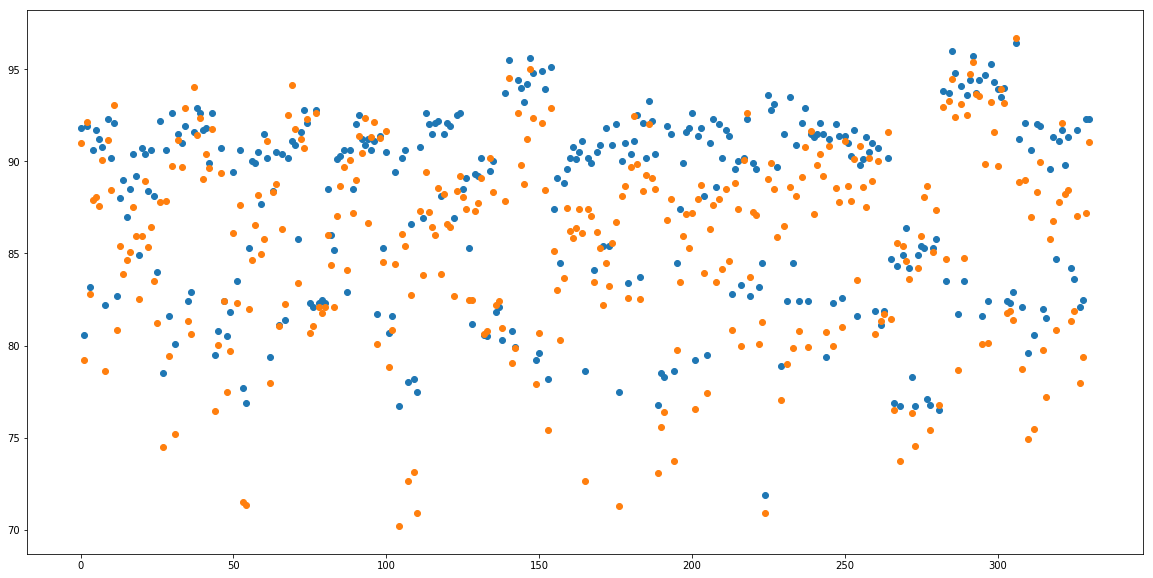

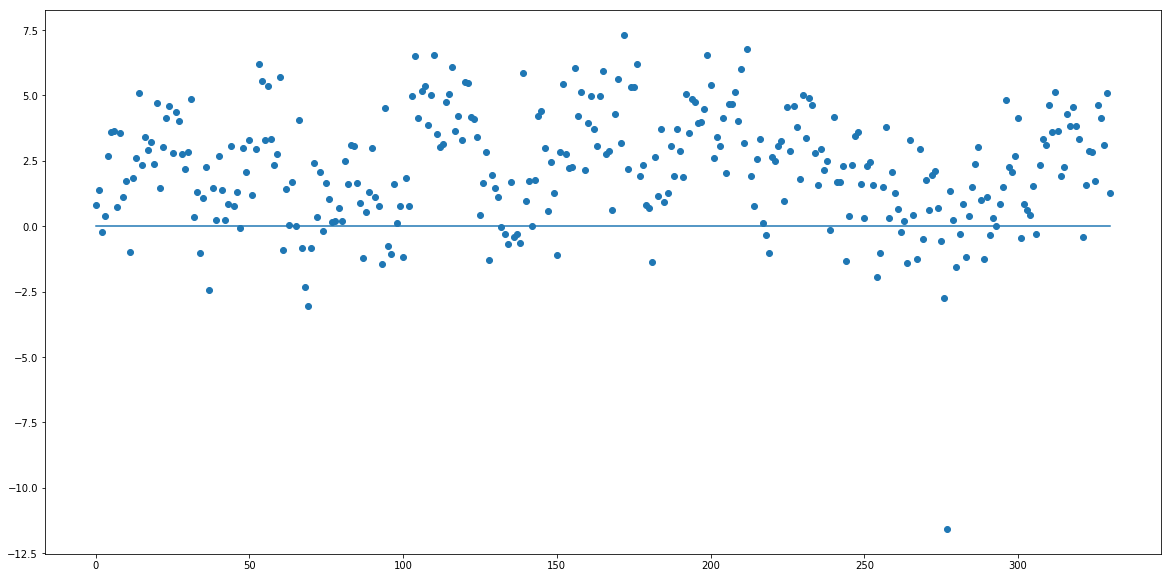


['160930_220317']
(array([277]),)
330
mean error 2.52831030303 error standard deviation 1.68131167331 max 7.3095 min 0.00320000000001 MSE 9.21916193121
shifted, not randomized around 0 because mean error 2.26871030303


In [6]:
deviation = labels-out
error = np.absolute(deviation)
print("mean error", np.mean(error), "error standard deviation", np.std(error), "max", np.amax(error), "min", np.amin(error), "MSE", np.mean(error**2))
print("shifted, not randomized around 0 because mean error", np.mean(deviation))
# print(labels-out)
plt.figure(figsize=(20,10))
plt.scatter(np.arange(len(labels)), labels)
plt.scatter(np.arange(len(out)), out)
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(np.arange(len(labels)), labels-out)
plt.plot(np.arange(len(labels)), np.zeros(len(labels)))
plt.show()
print()
print(col[np.where(error>10)])
print(np.where(error>8))
# print(col[150])

new = deviation[np.where(error<8)]
error = np.absolute(new)
print(len(new))
print("mean error", np.mean(error), "error standard deviation", np.std(error), "max", np.amax(error), "min", np.amin(error), "MSE", np.mean(error**2))
print("shifted, not randomized around 0 because mean error", np.mean(new))

In [7]:
col = csv['sportvision_pitch_id'].values
col = np.delete(col, inds)
print(len(col))
nr_videos = len(out)
inds = np.where(np.isnan(out))
print(col[inds].tolist())

inds = np.where(out>100)
print(out[inds])
labels = np.delete(labels, inds)
out = np.delete(out, inds)
too_high = len(inds[0])
inds = np.where(out<60)
print(out[inds])
labels = np.delete(labels, inds)
out = np.delete(out, inds)
too_low = len(inds[0])
print("outliers <60 or >100: ", too_low, too_high, (too_low+too_high)/(nr_videos-missing))

331
[]
[]
[]
outliers <60 or >100:  0 0 0.0
